In [2]:
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D

In [37]:
class RTree:
    def __init__(self,data,z,slicedIdx):
        self.data=data
        self.z=z
        self.isLeaf=True
        self.slicedIdx=slicedIdx # only save index to save memory
        self.left=None
        self.right=None
        self.output=np.mean(z[slicedIdx])
        self.j=None
        self.s=None
   # if a node has more than one data point, it will grow two child nodes 
    def grow(self):
        if len(self.slicedIdx)>1:
            j,s,_=bestDivi(self.data,self.z,self.slicedIdx)
            leftIdx,rightIdx=[],[]
            for i in self.slicedIdx:
                if self.data[i,j]<s:
                    leftIdx.append(i)
                else:
                    rightIdx.append(i)
                self.idLeaf=False
                self.left=RTree(self.data,self.z,leftIdx)
                self.right=RTree(self.data,self.z,rightIdx)
                self.j=j
                self.s=s
    def err(self):
        return np.mean(self.z[self.slicedIdx]-self.output**2)

    # calculate square error
    def squaErr(data,output,slicedIdex,j,s):
        # select child region
        region1=[]
        region2=[]
        for i in slicedIdx:
            if data[i,j]<s:
                region1.append(i)
            else:
                region2.append(i)
        #calculate the average output in child region
        c1=np.mean(output[region1])
        err1=np.sum((output[region1]-c1)**2)
        c2=np.mean(output[region2])
        err2=np.sum((output[region2]-c2)**2)
        return err1+err2
    #choose the best divide variable and best divide point
    def bestDivi(data,z,slicedIdx):
        min_j=0
        sortedValue=np.sort(data[slicedIdx][:,min_j])
        sliceValue=(sortedValue[1:]+sortedValue[:-1])/2
        for s in sliceValue:
            errNew = squaErr(data,z,slicedIdx,j,s)
            if errNew < err:
                err = errNew
                min_j = j
                min_s = s

        return min_j, min_s, err
    #update Tree
    def updateTree(tree):
        if tree.isLeaf:
            tree.grow()
        else:
            updateTree(tree.left)
            updateTree(tree.right)
    #predict one data point
    def predict(single_data,init_tree):
        tree = init_tree
        while True:
            if tree.isLeaf:
                return tree.output
            else:
                if single_data[tree.j] < tree.s:
                    tree = tree.left
                else:
                    tree = tree.right
#create test dataset
n_samples = 300
points = np.random.rand(n_samples,2)
z = points[:,0]+points[:,1] + 0.2*(np.random.rand(n_samples)-0.5)

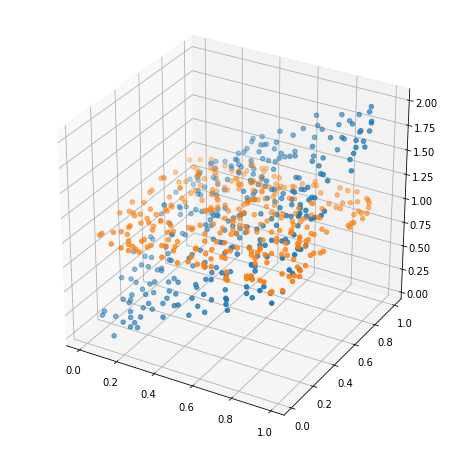

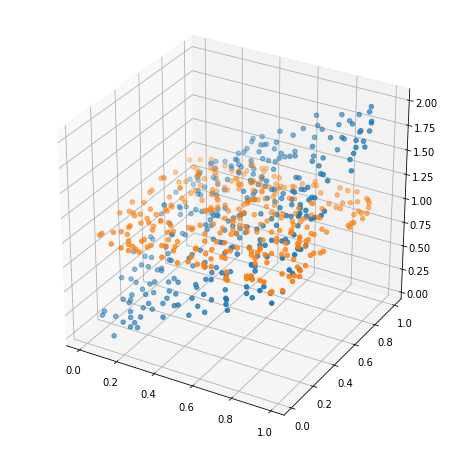

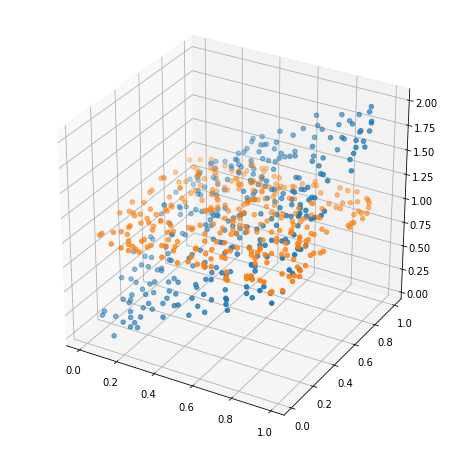

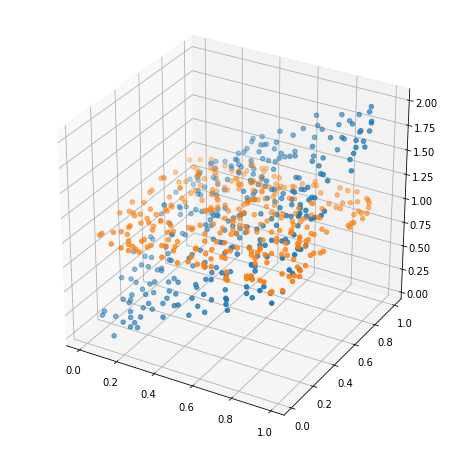

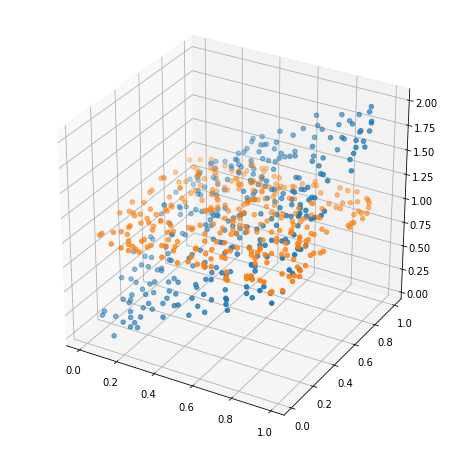

In [40]:
#create root
root=RTree(points,z,range(300))
#grow 5 times, observe how the model fits
for i in range(5):
    updateTree(root)
    z_predicted = np.array([predict(p,root) for p in points])    
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111,projection="3d")
    ax.scatter(points[:,0],points[:,1],z)
    ax.scatter(points[:,0],points[:,1],z_predicted)